In [57]:
%matplotlib inline 
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 281.8 kB/s eta 0:07:24
   ---------------------------------------- 0.1/124.9 MB 656.4 kB/s eta 0:03:11
   ---------------------------------------- 0.3/124.9 MB 1.5 MB/s eta 0:01:23
   ---------------------------------------- 0.6/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.8/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 1.0/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 1.2/124.9 MB 3.1 MB/s eta 0:00:41
   ---------------------------------------- 1.4/124.9 MB 3.1 MB/s eta 0:00:40
    --------------------------------------- 1.6/124.9 MB 3.3 MB/s eta 0:00:38
    --------------------------------------- 1.8/124.9 MB 3.3 MB/s eta 0:00:38
   

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_digits

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [5]:
data = load_iris()

In [6]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
attributes, targetes = data["data"], data["target"]

In [8]:
tree_iris = DecisionTreeClassifier()

In [9]:
tree_iris.fit(attributes, targetes)

DecisionTreeClassifier()

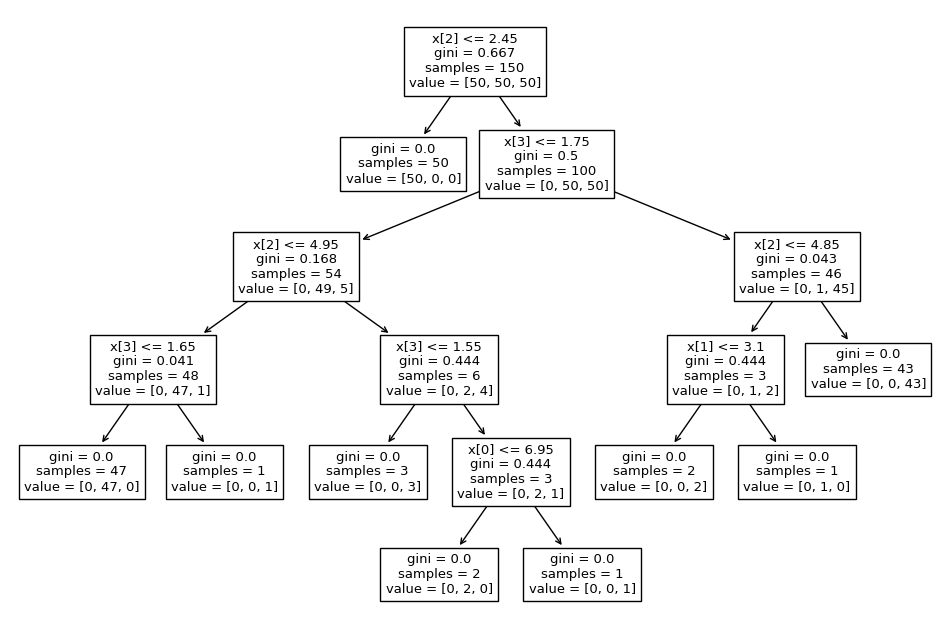

In [12]:
plt.figure(figsize=(12,8))
plot_tree(tree_iris)
plt.show()

In [14]:
digits = load_digits()

In [15]:
digit_tree = DecisionTreeClassifier()

In [17]:
attributes_digit, targetes_digit = digits["data"], digits["target"]

In [18]:
digit_tree.fit(attributes_digit, targetes_digit)

DecisionTreeClassifier()

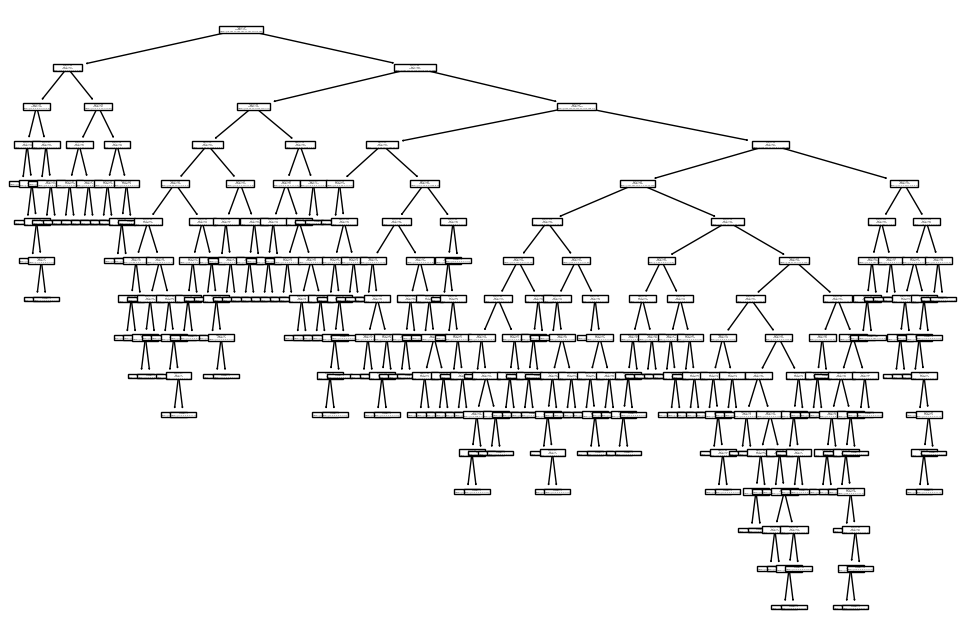

In [19]:
plt.figure(figsize=(12,8))
plot_tree(digit_tree)
plt.show()

In [21]:
print(export_text(digit_tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_61 <= 0.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_61 >  0.50
|   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_3 >  4.50
|   |   |   |   |   |--- feature_41 <= 2.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_41 >  2.50
|   |   |   |   |   |   |--- feature_33 <= 2.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_33 >  2.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_3 <= 3.00
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  3.00
|   |   |   |   |--- feature_55 <= 2.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_55 >  2.00
|   |   |   |   |   |--- class: 2
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_43 <= 0.50
|   |   |   |   |---

In [22]:
digit_tree.tree_.max_depth #dalbochina na darvoto

15

In [23]:
trees = [
    DecisionTreeClassifier(max_depth= 2),
    DecisionTreeClassifier(max_depth= 8),
    DecisionTreeClassifier(max_depth=20),
    DecisionTreeClassifier(max_depth= 20)
]

In [28]:
for tree in trees:
    tree.fit(attributes_digit, targetes_digit)

In [29]:
results = {}
for i, tree in enumerate(trees):
   results[f"tree{i}"] = tree.predict(attributes_digit)

results = pd.DataFrame(results)

In [30]:
results["target"] = targetes_digit

In [31]:
results

,tree0,tree1,tree2,tree3,target
0,0,0,0,0,0
1,7,1,1,1,1
2,7,8,2,2,2
3,6,3,3,3,3
4,0,4,4,4,4
...,...,...,...,...,...
1792,7,9,9,9,9
1793,0,0,0,0,0
1794,7,8,8,8,8
1795,7,9,9,9,9


In [38]:
forest = RandomForestClassifier(n_estimators=10)

In [39]:
forest.fit(attributes_digit, targetes_digit)

RandomForestClassifier(n_estimators=10)

In [40]:
forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=774372986),
 DecisionTreeClassifier(max_features='sqrt', random_state=284996086),
 DecisionTreeClassifier(max_features='sqrt', random_state=566167399),
 DecisionTreeClassifier(max_features='sqrt', random_state=243704442),
 DecisionTreeClassifier(max_features='sqrt', random_state=1407787722),
 DecisionTreeClassifier(max_features='sqrt', random_state=1458382319),
 DecisionTreeClassifier(max_features='sqrt', random_state=186137715),
 DecisionTreeClassifier(max_features='sqrt', random_state=244104548),
 DecisionTreeClassifier(max_features='sqrt', random_state=382865667),
 DecisionTreeClassifier(max_features='sqrt', random_state=1344091824)]

In [43]:
for estimator in forest.estimators_:
    print(estimator.tree_.max_depth)

15
13
15
14
12
14
15
14
13
14


In [47]:
list(zip(digits["feature_names"], forest.feature_importances_))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.002543816058125047),
 ('pixel_0_2', 0.028102313891772018),
 ('pixel_0_3', 0.01363653802384163),
 ('pixel_0_4', 0.014634536970994996),
 ('pixel_0_5', 0.01877721398833643),
 ('pixel_0_6', 0.008026384685095365),
 ('pixel_0_7', 0.0006028539550584618),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.00723450930324957),
 ('pixel_1_2', 0.02490118543969162),
 ('pixel_1_3', 0.00755368760892743),
 ('pixel_1_4', 0.021970855198658303),
 ('pixel_1_5', 0.028804814958790965),
 ('pixel_1_6', 0.004008443226301563),
 ('pixel_1_7', 0.0004283917558189095),
 ('pixel_2_0', 0.0003316043375512855),
 ('pixel_2_1', 0.009269265486266304),
 ('pixel_2_2', 0.022382808904829396),
 ('pixel_2_3', 0.013272399126425605),
 ('pixel_2_4', 0.03411425543799775),
 ('pixel_2_5', 0.04059320992941638),
 ('pixel_2_6', 0.012311763326962448),
 ('pixel_2_7', 8.248507281820784e-05),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.010805501738555618),
 ('pixel_3_2', 0.04701990373820813),
 ('pixel_3_3', 0.020736906580

In [48]:
forest.feature_importances_.sum()

1.0

In [50]:
permutation_importance(forest, attributes_digit, targetes_digit)

{'importances_mean': array([0.        , 0.        , 0.00567613, 0.00022259, 0.00066778,
        0.00189204, 0.00055648, 0.        , 0.        , 0.00178075,
        0.00356149, 0.        , 0.0031163 , 0.00089037, 0.        ,
        0.        , 0.        , 0.00100167, 0.0031163 , 0.00133556,
        0.00400668, 0.00823595, 0.00178075, 0.        , 0.        ,
        0.00166945, 0.01480245, 0.00489705, 0.00111297, 0.00100167,
        0.01892042, 0.        , 0.        , 0.00445186, 0.00289371,
        0.00066778, 0.00055648, 0.00289371, 0.00089037, 0.        ,
        0.        , 0.00066778, 0.04440735, 0.00255982, 0.00089037,
        0.00511964, 0.00100167, 0.        , 0.        , 0.        ,
        0.00033389, 0.00345019, 0.00089037, 0.00222593, 0.00089037,
        0.        , 0.        , 0.        , 0.00089037, 0.0001113 ,
        0.00946021, 0.00122426, 0.00111297, 0.        ]),
 'importances_std': array([0.        , 0.        , 0.00089037, 0.00027262, 0.00041643,
        0.0005675 ,

In [53]:
list(zip(digits["feature_names"], permutation_importance(forest, attributes_digit, targetes_digit)["importances_mean"]))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.0),
 ('pixel_0_2', 0.005342237061769684),
 ('pixel_0_3', 0.0),
 ('pixel_0_4', 0.0010016694490818435),
 ('pixel_0_5', 0.0020033388981636423),
 ('pixel_0_6', 0.0008903728436283175),
 ('pixel_0_7', 0.0),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.0015581524763494726),
 ('pixel_1_2', 0.002671118530884842),
 ('pixel_1_3', 0.0),
 ('pixel_1_4', 0.0030050083472454416),
 ('pixel_1_5', 0.0017807456872565685),
 ('pixel_1_6', 0.0),
 ('pixel_1_7', 0.0),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.0016694490818030428),
 ('pixel_2_2', 0.002337228714524264),
 ('pixel_2_3', 0.0010016694490818435),
 ('pixel_2_4', 0.004229271007234336),
 ('pixel_2_5', 0.007679465776293859),
 ('pixel_2_6', 0.0017807456872565685),
 ('pixel_2_7', 0.0),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.001335559265442443),
 ('pixel_3_2', 0.013912075681691727),
 ('pixel_3_3', 0.003116304952698945),
 ('pixel_3_4', 0.0015581524763494947),
 ('pixel_3_5', 0.0008903728436283175),
 ('pixel_3_6', 0.016917084028937147)